In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Birds
Classificate [Caltech birds dataset](http://www.vision.caltech.edu/visipedia/CUB-200-2011.html)

In [ ]:
from fastai.datasets import URLs, untar_data

# Copy-paste classification from lesson 1 fast.ai

In [3]:
data_path = untar_data(URLs.CUB_200_2011)

In [ ]:
images_path = data_path/'images'

In [5]:
from fastai.vision import get_image_files
image_files = list()
for folder in images_path.ls(): 
  image_files += get_image_files(folder)
image_files[0]

PosixPath('/root/.fastai/data/CUB_200_2011/images/030.Fish_Crow/Fish_Crow_0043_25847.jpg')

In [ ]:
pattern = r'images/\d+\.(\w+)/'

In [ ]:
from fastai.vision import ImageDataBunch, get_transforms, imagenet_stats
data = ImageDataBunch.from_name_re(images_path, image_files, pattern, ds_tfms=get_transforms(), size=299, bs=32
                                  ).normalize(imagenet_stats)

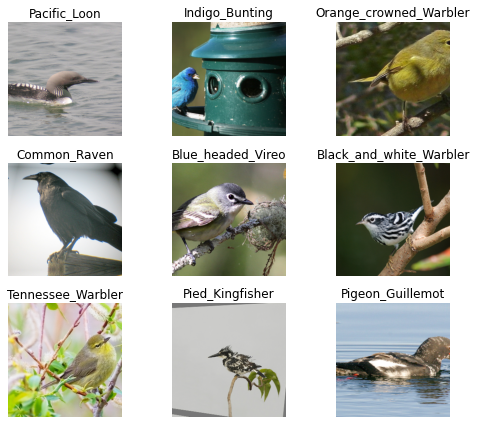

In [ ]:
data.show_batch(rows=3, figsize=(7,6))

In [ ]:
print(data.classes)

['Acadian_Flycatcher', 'American_Crow', 'American_Goldfinch', 'American_Pipit', 'American_Redstart', 'American_Three_toed_Woodpecker', 'Anna_Hummingbird', 'Artic_Tern', 'Baird_Sparrow', 'Baltimore_Oriole', 'Bank_Swallow', 'Barn_Swallow', 'Bay_breasted_Warbler', 'Belted_Kingfisher', 'Bewick_Wren', 'Black_Tern', 'Black_and_white_Warbler', 'Black_billed_Cuckoo', 'Black_capped_Vireo', 'Black_footed_Albatross', 'Black_throated_Blue_Warbler', 'Black_throated_Sparrow', 'Blue_Grosbeak', 'Blue_Jay', 'Blue_headed_Vireo', 'Blue_winged_Warbler', 'Boat_tailed_Grackle', 'Bobolink', 'Bohemian_Waxwing', 'Brandt_Cormorant', 'Brewer_Blackbird', 'Brewer_Sparrow', 'Bronzed_Cowbird', 'Brown_Creeper', 'Brown_Pelican', 'Brown_Thrasher', 'Cactus_Wren', 'California_Gull', 'Canada_Warbler', 'Cape_Glossy_Starling', 'Cape_May_Warbler', 'Cardinal', 'Carolina_Wren', 'Caspian_Tern', 'Cedar_Waxwing', 'Cerulean_Warbler', 'Chestnut_sided_Warbler', 'Chipping_Sparrow', 'Chuck_will_Widow', 'Clark_Nutcracker', 'Clay_colore

In [ ]:
from fastai.vision import cnn_learner, models
from fastai.metrics import error_rate
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [ ]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,time
0,3.570793,2.244567,0.555367,03:52
1,2.132174,1.422802,0.375053,03:47
2,1.657872,1.146010,0.321595,03:44
3,1.354135,1.023661,0.280866,03:42
4,1.067117,0.918053,0.247348,03:42
5,0.911815,0.877875,0.235893,03:40
6,0.681416,0.788431,0.217650,03:45
7,0.539967,0.736927,0.203224,03:44
8,0.430243,0.714698,0.195163,03:42
9,0.395214,0.711860,0.193466,03:41


In [ ]:
learn.save('stage-1')

In [ ]:
from fastai.vision import ClassificationInterpretation
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
import re 
from collections import Counter

print(len(data.classes))
some_classes = list()
for c in data.classes:
  m = re.match(r'.*(Swallow|Raven|Sparrow|Tern)', c)
  if m is not None:
    some_classes.append(m.group(1))
print(Counter(some_classes))

200
Counter({'Sparrow': 21, 'Tern': 7, 'Swallow': 4, 'Raven': 2})


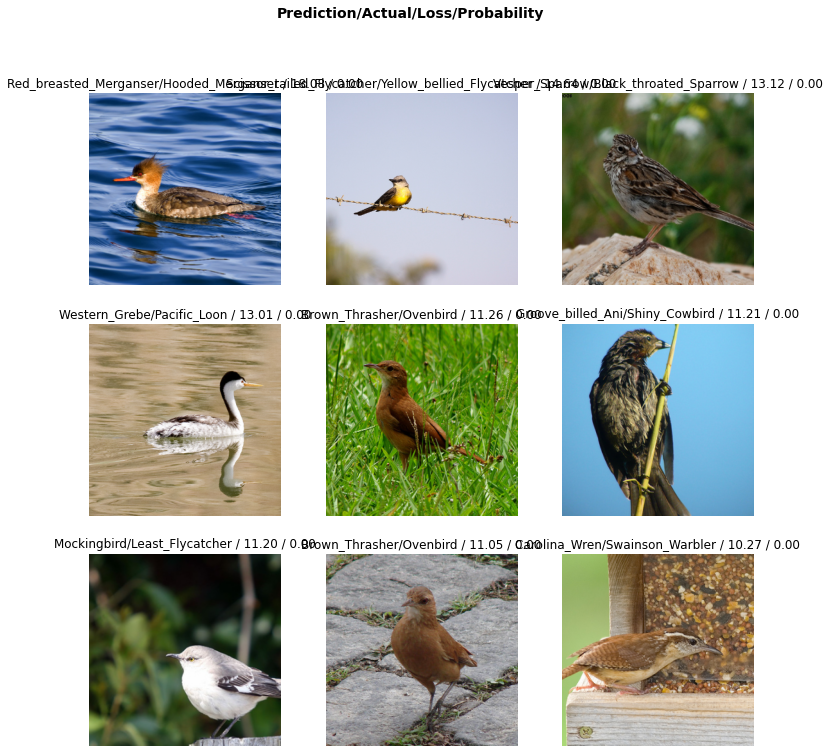

In [ ]:
interp.plot_top_losses(9)

In [ ]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


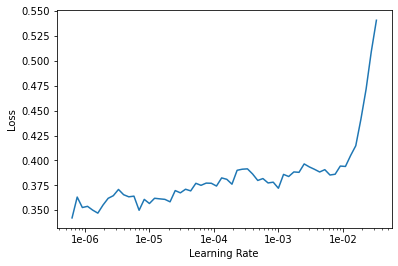

In [ ]:
learn.recorder.plot()

In [ ]:
'''
Первый вызов fit_one_cycle работал на предобученной модели и на самом деле обучал только несколько последних слоев
После вызовы unfreeze вся модель будет обучаться заново
'''
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.387264,0.746375,0.196436,07:16
1,0.385425,0.737543,0.193042,07:09


In [ ]:
!ls /root/.fastai/

config.yml  data


In [ ]:
learn.load('first_attempt')

In [ ]:
# Поэтому загружаем предобученную модель и учим с посчитанным lerning rate
learn.fit_one_cycle(5, max_lr=slice(1e-6,1e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.383827,0.746709,0.201952,07:11
1,0.374296,0.743993,0.199830,07:10
2,0.370602,0.733728,0.191769,07:10
3,0.339621,0.733948,0.192193,07:10
4,0.338401,0.734418,0.193891,07:11


In [ ]:
learn.fit_one_cycle(10, max_lr=slice(1e-6,1e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.307848,0.730996,0.189224,07:12
1,0.348721,0.730809,0.188799,07:10
2,0.318060,0.728849,0.185405,07:10
3,0.307150,0.727887,0.186254,07:10
4,0.298341,0.716502,0.183708,07:10
5,0.302388,0.714524,0.181587,07:09


# Reduce number of classes

Я собираюсь попробовать классифицировать не все 200 классов, а объединить классы в более общие (воробей, ласточка, ворон).
Это нужно
1. v0 которую можно будет уже деплоить
2. просто проверить, как это будет работать


In [9]:
print(images_path.ls()[0])
print(images_path.ls()[0].ls())

/root/.fastai/data/CUB_200_2011/images/030.Fish_Crow
[PosixPath('/root/.fastai/data/CUB_200_2011/images/030.Fish_Crow/Fish_Crow_0043_25847.jpg'), PosixPath('/root/.fastai/data/CUB_200_2011/images/030.Fish_Crow/Fish_Crow_0035_26081.jpg'), PosixPath('/root/.fastai/data/CUB_200_2011/images/030.Fish_Crow/Fish_Crow_0032_26014.jpg'), PosixPath('/root/.fastai/data/CUB_200_2011/images/030.Fish_Crow/Fish_Crow_0025_25893.jpg'), PosixPath('/root/.fastai/data/CUB_200_2011/images/030.Fish_Crow/Fish_Crow_0017_26127.jpg'), PosixPath('/root/.fastai/data/CUB_200_2011/images/030.Fish_Crow/Fish_Crow_0085_25919.jpg'), PosixPath('/root/.fastai/data/CUB_200_2011/images/030.Fish_Crow/Fish_Crow_0012_25946.jpg'), PosixPath('/root/.fastai/data/CUB_200_2011/images/030.Fish_Crow/Fish_Crow_0024_26064.jpg'), PosixPath('/root/.fastai/data/CUB_200_2011/images/030.Fish_Crow/Fish_Crow_0016_25854.jpg'), PosixPath('/root/.fastai/data/CUB_200_2011/images/030.Fish_Crow/Fish_Crow_0073_25977.jpg'), PosixPath('/root/.fastai/d

In [ ]:
images_path.ls()

In [ ]:
def get_labels(s):
  n = s.parts[-2] # Это название папки
  n = n.split('.')[-1] # Убираем цифру в названии
  spl = n.split('_')
  if len(spl) == 1:
    return spl[0]
  else:
    return spl[-1]
  

In [ ]:
from fastai.vision import ImageDataBunch, get_transforms, imagenet_stats
reduced_data = ImageDataBunch.from_name_func(images_path, image_files, get_labels, ds_tfms=get_transforms(), size=299, bs=32
                                  ).normalize(imagenet_stats)

In [25]:
len(data.classes), data.c

(70, 70)

In [26]:
reduced_data.show_batch()

Output hidden; open in https://colab.research.google.com to view.

In [31]:
from fastai.vision.learner import cnn_learner
from fastai.vision.models import resnet50
from fastai.metrics import error_rate
small_learn = cnn_learner(reduced_data, resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [32]:
small_learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,time
0,1.905956,1.049362,0.295291,03:45
1,1.244332,0.797942,0.241833,03:40
2,0.966096,0.624610,0.189224,03:39
3,0.753481,0.576361,0.181162,03:39
4,0.651618,0.484772,0.139160,03:38
5,0.469657,0.458747,0.129826,03:37
6,0.391256,0.395487,0.114977,03:38
7,0.303588,0.376102,0.112007,03:37
8,0.258409,0.365176,0.108613,03:37
9,0.239259,0.359147,0.101400,03:36


In [33]:
small_learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.416684,0.480577,0.134069,03:38
1,0.283327,0.394866,0.112855,03:37


In [34]:
small_learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


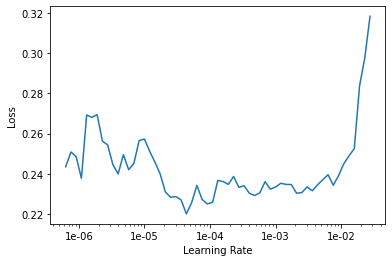

In [36]:
small_learn.recorder.plot()

In [ ]:
small_learn.fit_one_cycle(10, max_lr=slice(5e-05, 1e-04))

epoch,train_loss,valid_loss,error_rate,time
0,0.248108,0.394872,0.115401,03:34


# Run with local data
Разбил данные на train и validation самостоятельно так, чтобы каждый класс был и там, и там. Пробую с таким датасетом

In [3]:
from fastai.vision import ImageDataBunch, get_transforms, imagenet_stats
from pathlib import Path

In [5]:
local_data = ImageDataBunch.from_folder(Path('./images'), valid='validation', ds_tfms=get_transforms(), size=299, bs=32
                                  ).normalize(imagenet_stats)

In [7]:
from fastai.vision import cnn_learner, models
from fastai.metrics import error_rate

In [8]:
local_learner = cnn_learner(local_data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /Users/ddemidov/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [9]:
local_learner.fit_one_cycle(10)

epoch     train_loss  valid_loss  error_rate  time    


KeyboardInterrupt: 